In [21]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataframe_location_2019_2020 = pd.read_csv("MigratoryBirds/resources/original_data/FinlandNestDatafile.csv")
dataframe_location_2021 = pd.read_csv("MigratoryBirds/resources/original_data/Finland_nestdata2021_mod.csv")
dataframe_mobbing_2019_2020 = pd.read_csv("MigratoryBirds/resources/original_data/FinlandMobbingDatafile.csv")
dataframe_mobbing_2021 = pd.read_csv("MigratoryBirds/resources/original_data/Finland_ExperimentData2021_mod.csv")

# combine mobbing dataframes:
dataframe_mobbing = pd.concat([dataframe_mobbing_2021,dataframe_mobbing_2019_2020], axis=0, ignore_index=True)
# combine locations:
dataframe_location_2021['Year'] = np.repeat(2021, dataframe_location_2021.shape[0])
dataframe_location = pd.concat([dataframe_location_2019_2020,dataframe_location_2021], axis=0, ignore_index=True)

dataframe_mobbing = dataframe_mobbing.drop(
    columns=['Site', 'Year', 'lat', 'long', 'Cuckoo_perch', 'New_rebuild', 'Rebuild_original']
)

data = pd.merge(dataframe_location, dataframe_mobbing, left_on='NestID', right_on='NestID', how = 'left')

In [3]:
for i in range(data.shape[0]):
    if data['Propensity'][i] == 0:
        data.loc[i, 'mobbing'] = 'shy'
    elif data['Propensity'][i] == 1:
        data.loc[i, 'mobbing'] = 'aggressive'
    else:
        data.loc[i, 'mobbing'] = 'no info'

In [4]:
data

,NestID,Site,lat,long,Year,Date_nest_found,Cuckoo_perch,New_rebuild,Rebuild_original,Model,Date_trial,Rasps,Bill_snaps,SnapsRasps,Propensity,Laydate_first_egg,Days_from_LD,mobbing
0,19KR1,Kodderviken,60.34265,25.60605,2019,19.5.2019,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no info
1,19EK1,Hyljelahti,60.14196,24.69826,2019,27.5.2019,70.0,0.0,NaN,Cuckoo,6/6/2019,0.0,0.0,0.0,0.0,6/3/2019,3.0,shy
2,19EK2,Myrans,60.19962,24.07649,2019,29.5.2019,5.0,0.0,NaN,Cuckoo,5/31/2019,0.0,0.0,0.0,0.0,5/28/2019,3.0,shy
3,19EK3,Myrans,60.19983,24.07585,2019,29.5.2019,15.0,0.0,NaN,Cuckoo,6/6/2019,0.0,0.0,0.0,0.0,6/3/2019,3.0,shy
4,19EK4,Mataskärsviken,60.13318,24.69677,2019,30.5.2019,23.0,0.0,NaN,Cuckoo,6/7/2019,111.0,21.0,132.0,1.0,6/4/2019,3.0,aggressive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,21NB33,Källsund,60.33639,25.69819,2021,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no info
414,21KR49,Bjurvik,60.33979,25.71288,2021,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no info
415,21KR50,Bjurvik,60.34053,25.71125,2021,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no info
416,21KR51,Källsund,60.33584,25.69848,2021,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no info


In [5]:
data[data.Year == 2021].Site.value_counts()

Kodderviken         19
Otaniemi            17
Smedjeviken         11
Soukanlahti         10
Vuosaari             9
Suomenoja            8
Sperringssund        8
Kotilahti            7
Sipoonranta          6
Kaitalahti           6
Nätholmen            5
Leposaari            5
Pikku-Huopalahti     5
Mataskärsviken       5
Fågelvik             4
Otaniemi             4
Bjurvik              4
Puotila              3
Kaitalahti N         3
Hyljelahti           3
Storminnet           3
Kodderviken          3
Nuottalahti          2
Smedjeviken BT       2
Källsund             2
Lemislahti           2
Talinranta           2
Lemislahti           1
Nätholmen            1
Yliskylä             1
Vikkulla             1
Tullisaari           1
Korsnäs              1
Yliskylä             1
Kråkö                1
Leposaari            1
Matasaarentie        1
Jollas               1
Suomenoja            1
Kaitalahti           1
Name: Site, dtype: int64

In [6]:
data[data.Year == 2020].Site.value_counts()

Kodderviken              24
Otaniemi                 16
Vuosaari                  9
Mataskärsviken            8
Soukanlahti               7
Storminnet                7
Talinranta                6
Sipoonranta               6
Norra Fladet              5
Kaitalahti                5
Hyljelahti                5
Nuottalahti               5
Suomenoja                 5
Kotilahti                 4
Nätholmen                 4
Fiskarviken               4
Pikku-Huopalahti          4
Rantakylä                 4
Medvast                   4
Vikkulla                  4
Yliskylä                  4
Rulludd                   2
Fladet Morsfjärdintie     2
Smedjeviken               2
Tullisaari                2
Sperringssund             2
Matasaarentie             2
Ramsaynranta              1
Koivusaari                1
Fågelvik                  1
Name: Site, dtype: int64

In [7]:
data[data.Year == 2019].Site.value_counts()

Kodderviken         11
Vuosaari             8
Hyljelahti           8
Soukanlahti          8
Mataskärsviken       7
Smedjeviken          6
Fiskarviken          6
Norra Fladet         5
Myrans               4
Suomenoja            4
Nuottalahti          3
Matasaarentie        3
Sperringssund        3
Dyviken              2
Rulludd              2
Pikku-Huopalahti     2
Storminnet           2
Kaitalahti           2
Porvoo               2
Ramsaynranta         1
Linlo                1
Fågelvik             1
Bjurvik              1
Name: Site, dtype: int64

In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_one_year(data, year, site, plot = False):
    tmp = data[(data.Year == year) & (data.Site == site)]
    
    if plot:
        fig = px.scatter_mapbox(tmp, lat="lat", lon="long", hover_name="NestID", hover_data=["Site", "Propensity"], 
                            height = 300, color = "mobbing", 
                            color_discrete_map={ 'shy': 'blue', 'aggressive': 'red', 'no info': 'grey'},
                            width = 500, zoom = 13, title = site + ', Year: ' + str(year))
        fig.update_layout(mapbox_style="open-street-map")
        fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
        fig.show()
    
    n_no_test = np.sum(pd.isnull(tmp.Propensity))
    n_shy = np.sum(tmp.Propensity == 0)
    n_aggressive = np.sum(tmp.Propensity == 1)
    
    return [n_no_test, n_shy, n_aggressive]

def plot_all_years(data, site):
    tmp = data[(data.Site == site)]
    
    fig = px.scatter_mapbox(tmp, lat="lat", lon="long", hover_name="NestID", hover_data=["Site", "Propensity"], 
                        height = 300, color = tmp.Year.astype(str), 
                        width = 500, zoom = 13, title = site)
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
    fig.show()

In [26]:
from matplotlib.pyplot import figure
import plotly.express as px

def create_stacked_bar_chart(data, year):
    unique_sites = data[data.Year == year].Site.unique()
    a = []
    
    for i in range(len(unique_sites)):
        #print([unique_sites[i]] + plot_one_year(data, year, unique_sites[i]))
        a.append([unique_sites[i]] + plot_one_year(data, year, unique_sites[i]))
    
    a = pd.DataFrame(a, columns=['Site', 'No_test', 'N_shy', 'N_aggressive'])

    
    a.plot(
        x = 'Site',
        kind = 'barh',
        stacked = True,
        title = 'Stacked Bar Graph',
        mark_right = True)

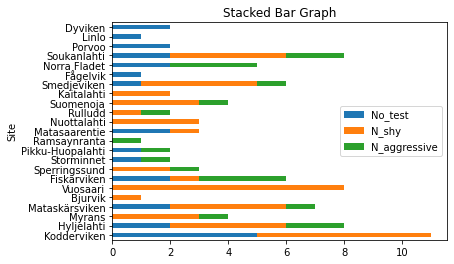

In [27]:
create_stacked_bar_chart(data, 2019)

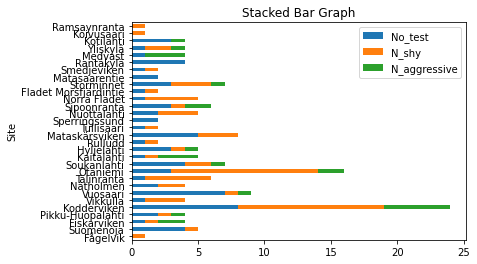

In [28]:
create_stacked_bar_chart(data, 2020)

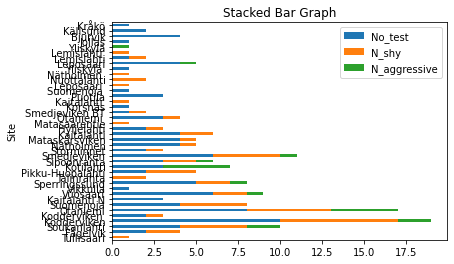

In [29]:
create_stacked_bar_chart(data, 2021)

In [20]:
plot_all_years(data, 'Matasaarentie')

In [18]:
site = 'Matasaarentie'

plot_one_year(data, 2019, site, True)
plot_one_year(data, 2020, site, True)
plot_one_year(data, 2021, site, True)

plot_all_years(data, site)

In [19]:


fig = px.scatter_mapbox(data[data.Year == 2021], lat="lat", lon="long", hover_name="NestID", hover_data=["Site"], color="Site", zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()